Libraries

In [14]:
import pandas as pd
import numpy as np

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [17]:
df = pd.read_csv("Data.csv")
print(df)

       Total Household Income              Region  Staple Food Expenditure  \
0                        9370                 CAR                     1736   
1                        3540                 CAR                      718   
2                        1478                 CAR                     1281   
3                        2199                 CAR                     1273   
4                        4732                 CAR                     1386   
...                       ...                 ...                      ...   
41539                    3820  XII - SOCCSKSARGEN                      906   
41540                    3850  XII - SOCCSKSARGEN                      159   
41541                    4138  XII - SOCCSKSARGEN                     1076   
41542                    4231  XII - SOCCSKSARGEN                     1206   
41543                    4181  XII - SOCCSKSARGEN                     1676   

                 Source of Income  Agricultural Household indic

In [24]:
isnull = df.isnull().sum()
print(isnull)

Total Household Income                     0
Region                                     0
Staple Food Expenditure                    0
Source of Income                           0
Agricultural Household indicator           0
Meat Expenditure                           0
Seafood Expenditure                        0
Leisure Expenditure                        0
Alcohol Expenditure                        0
Tobacco Expenditure                        0
Medical Expenditure                        0
Transportation Expenditure                 0
Communication Expenditure                  0
Utilities Expenditure                      0
Housing Tax                                0
Education Expenditure                      0
Crop Farming Expenditure                   0
Household Head Gender                      0
Household Head Age                         0
Household Head Marital Status              0
Household Head Highest Grade Completed     0
Education Rank                             0
Household 

In [25]:
statistics = df.describe()
print(statistics)

       Total Household Income  Staple Food Expenditure  \
count            41544.000000             41544.000000   
mean              5391.412310               908.705108   
std               6946.279063               472.302660   
min                214.000000                 0.000000   
25%               2309.000000               604.000000   
50%               3662.000000               848.000000   
75%               6233.250000              1142.000000   
max             342632.000000             27322.000000   

       Agricultural Household indicator  Meat Expenditure  \
count                      41544.000000      41544.000000   
mean                           0.429858        188.230310   
std                            0.676666        187.459972   
min                            0.000000          0.000000   
25%                            0.000000         60.000000   
50%                            0.000000        131.000000   
75%                            1.000000        255

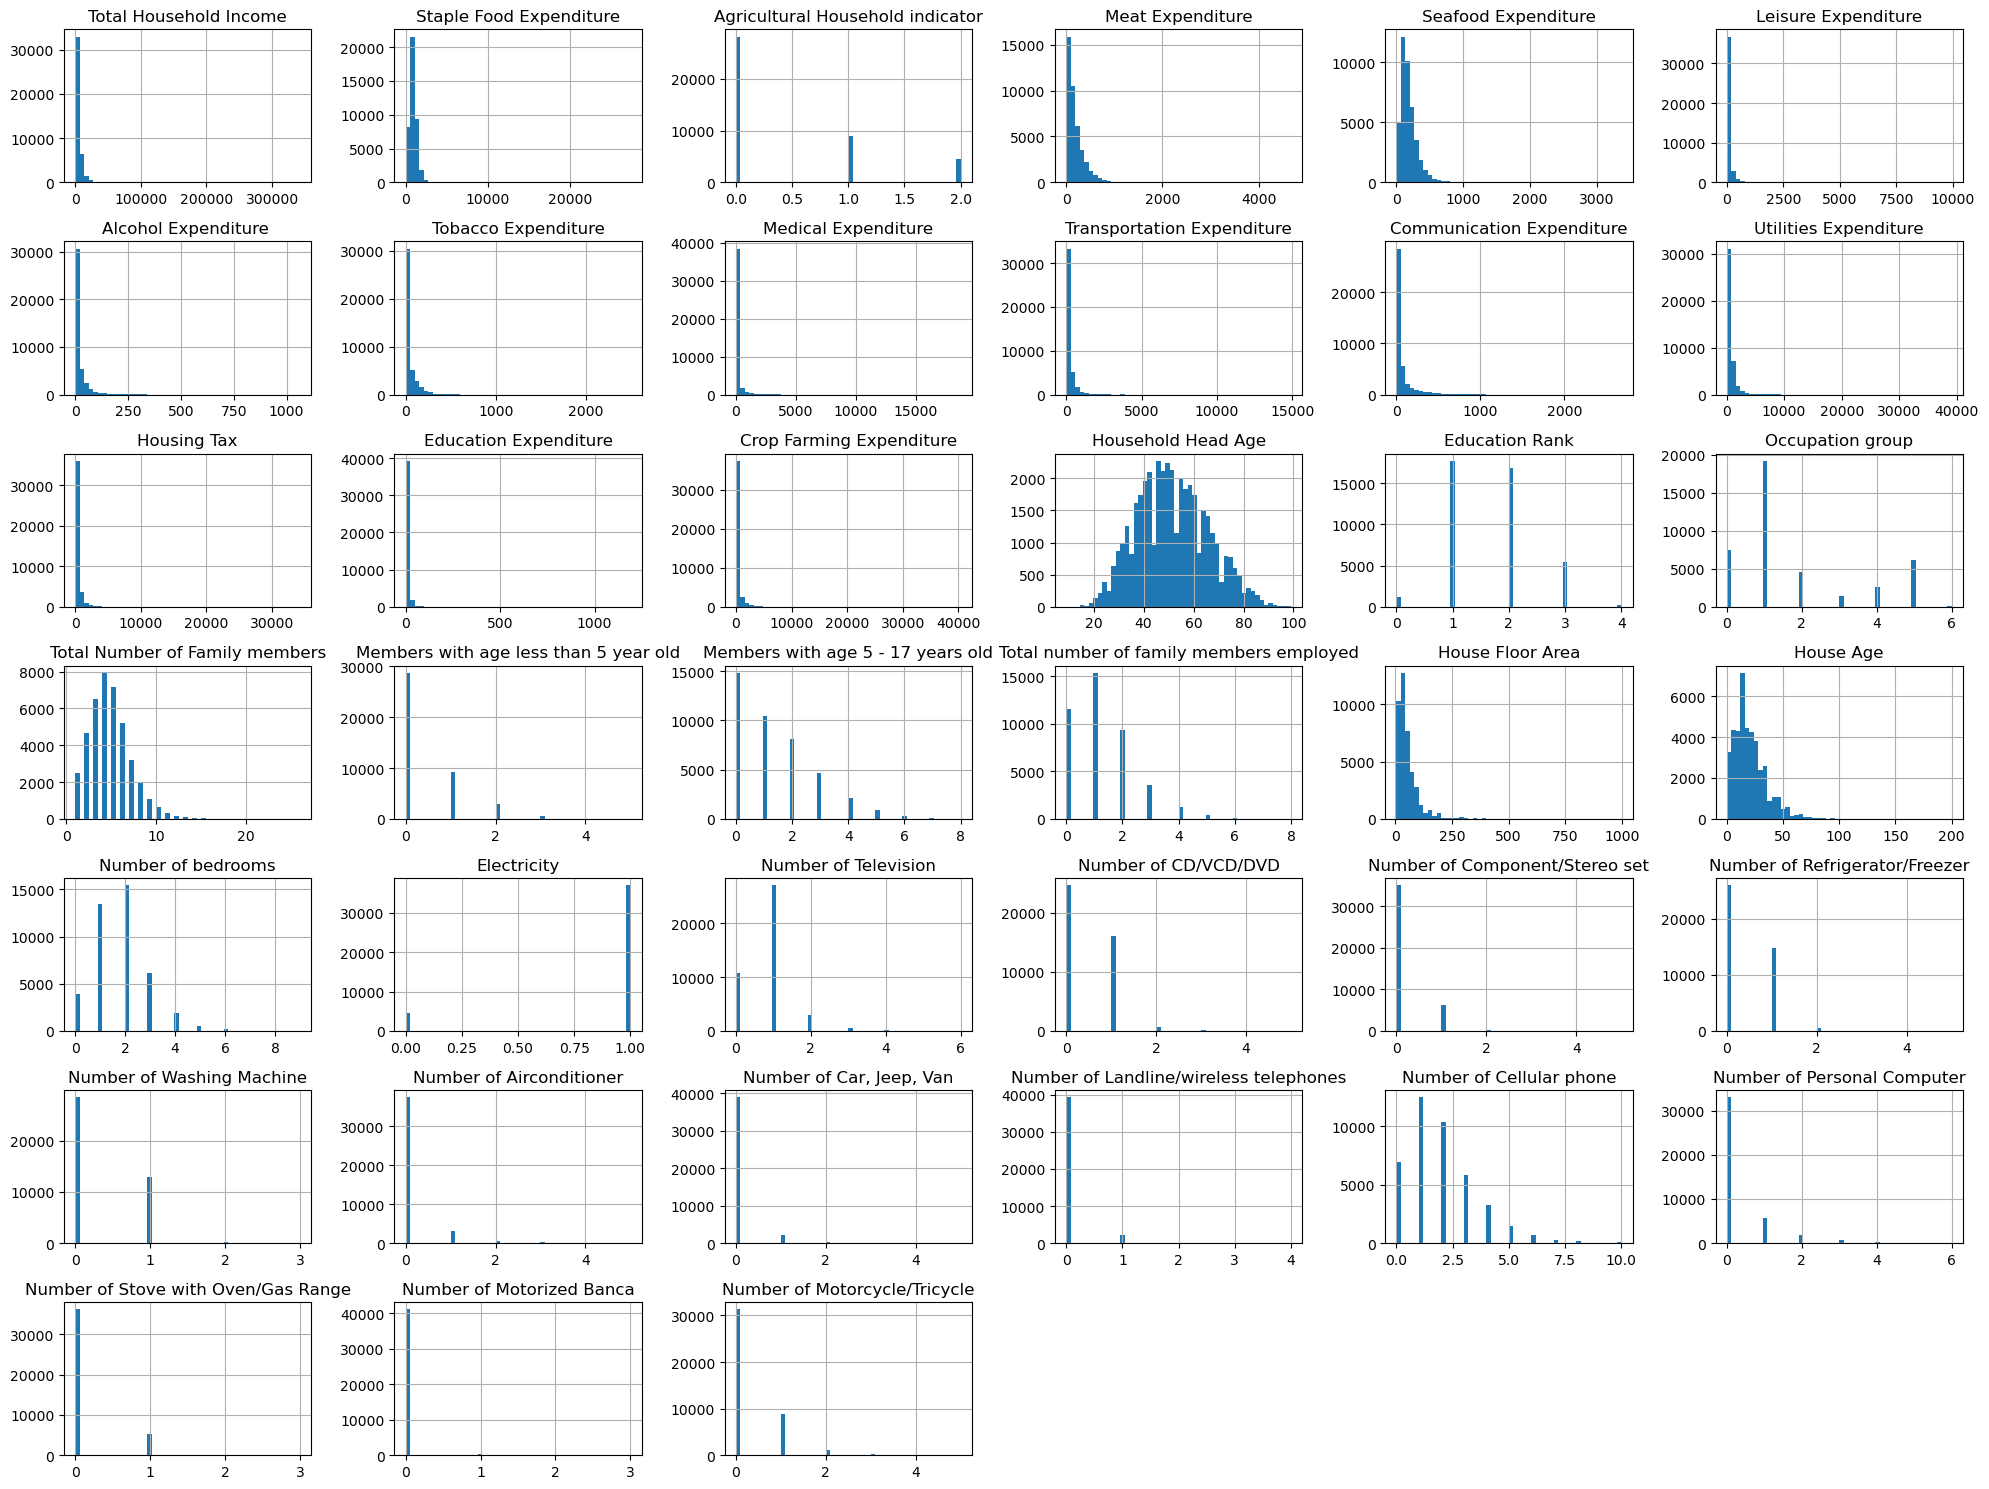

In [30]:
df.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()